<center><img src="redpopcorn.jpg"></center>


**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data

### **netflix_data.csv**

| Column         | Description                     |
| -------------- | ------------------------------- |
| `show_id`      | The ID of the show              |
| `type`         | Type of show                    |
| `title`        | Title of the show               |
| `director`     | Director of the show            |
| `cast`         | Cast of the show                |
| `country`      | Country of origin               |
| `date_added`   | Date added to Netflix           |
| `release_year` | Year of Netflix release         |
| `duration`     | Duration of the show in minutes |
| `description`  | Description of the show         |
| `genre`        | Show genre                      |


In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [2]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [3]:
# Start coding here! Use as many cells as you like
filtered_netflix = netflix_df[
    (netflix_df["type"] == "Movie") & (netflix_df["release_year"] < 2000)
]
filtered_netflix.describe()

,release_year,duration
count,374.000000,374.000000
mean,1985.844920,115.828877
std,11.900504,34.701680
min,1942.000000,18.000000
25%,1979.000000,93.000000
50%,1989.000000,108.500000
75%,1995.000000,136.750000
max,1999.000000,253.000000


In [4]:
duration_count = filtered_netflix["duration"].value_counts()
print(duration_count)

duration
94     13
93     13
96      9
101     9
108     9
       ..
58      1
189     1
192     1
171     1
191     1
Name: count, Length: 130, dtype: int64


In [5]:
duration = duration_count.idxmax()
print(duration)

94


In [6]:
short_movie_count = (
    (filtered_netflix["duration"] < 90) & (filtered_netflix["genre"] == "Action")
).sum()
print(short_movie_count)

13


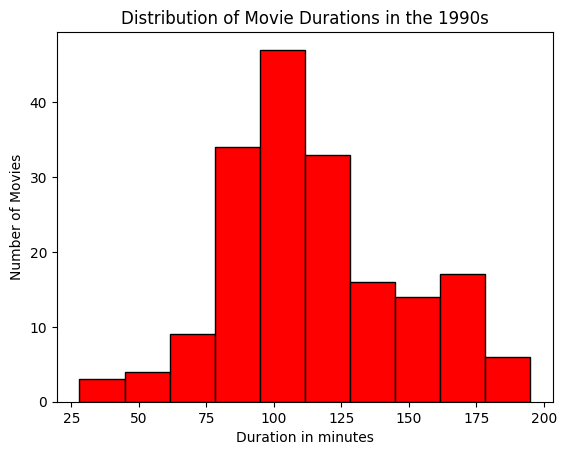

7


In [7]:
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

movies1990s = netflix_subset[
    (netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)
]

plt.hist(movies1990s["duration"], edgecolor="black", color="red")
plt.title("Distribution of Movie Durations in the 1990s")
plt.xlabel("Duration in minutes")
plt.ylabel("Number of Movies")
plt.show()

action_movies1990s = movies1990s[movies1990s["genre"] == "Action"]

short_movie_count = 0
for label, rows in action_movies1990s.iterrows():
    if rows["duration"] < 90:
        short_movie_count += 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

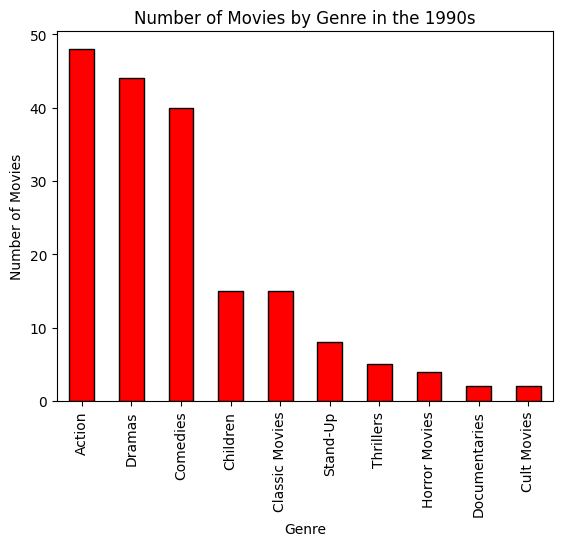

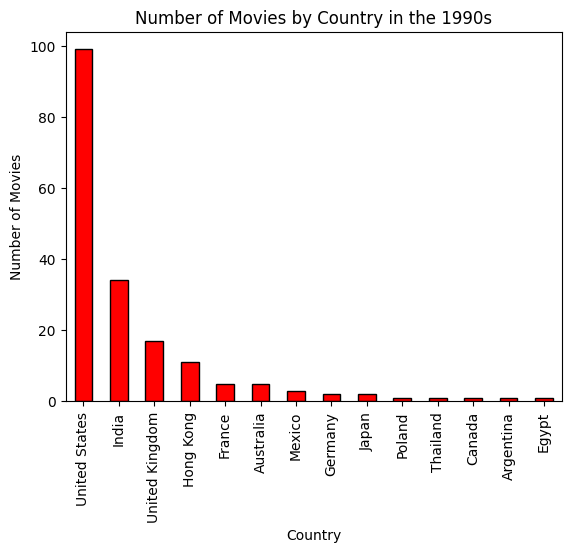

In [8]:
genre_counts = movies1990s["genre"].value_counts()
country_counts = movies1990s["country"].value_counts()

genre_counts.plot(
    kind="bar",
    title="Number of Movies by Genre in the 1990s",
    edgecolor="black",
    color="red",
)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

country_counts.plot(
    kind="bar",
    title="Number of Movies by Country in the 1990s",
    edgecolor="black",
    color="red",
)
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.show()